In [1]:
from ultralytics import YOLO
import os
import torch
import glob
import pandas as pd
import matplotlib.pyplot as plt
import math
import torch.nn as nn
import torch.optim as optim
import plot
import distance_estimation
import utils


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
robot_height = 0.545 # m
torch.manual_seed(0)

In [3]:
model = YOLO("Training_Results/insta360_train1/HR_First_Floor_2048X2048/weights/best.pt")  # load a pretrained model (recommended for training)  D:\Ulindu\turtlebot_detection\Training_Results\insta360_train1\HR_First_Floor_2048X2048\weights\best.pt
# Move the model to the GPU if available      
model.to(device)
print(model.device)


cuda:0


In [4]:
data_dir = f'insta360/2024-02-20-16-44-28_images/*.jpg'        #insta360\validation_2024-02-06-21-40-49_images

column_names = ['timestamp', 'x', 'y','heading']
gt_df = pd.read_csv('insta360/2024-02-20-16-44-28_gt.txt',sep=',',names=column_names)

In [5]:
trained_model = distance_estimation.Distance()
trained_model.load_state_dict(torch.load("./models/model_1-8-16-32-64-32-16-8-1_2048X2048imgs_first_floor.pth")) 
trained_model.to(device)

Distance(
  (layer1): Linear(in_features=1, out_features=8, bias=True)
  (layer2): Linear(in_features=8, out_features=16, bias=True)
  (layer3): Linear(in_features=16, out_features=32, bias=True)
  (layer4): Linear(in_features=32, out_features=64, bias=True)
  (layer5): Linear(in_features=64, out_features=32, bias=True)
  (layer6): Linear(in_features=32, out_features=16, bias=True)
  (layer7): Linear(in_features=16, out_features=8, bias=True)
  (layer8): Linear(in_features=8, out_features=1, bias=True)
  (activation): ReLU()
)

In [6]:
data_df = utils.detection_get_distance_checkkkkkkkkkk(data_dir, yolo_model=model, distance_estimation_model=trained_model)  


image 1/1 d:\Ulindu\turtlebot_detection\insta360\2024-02-20-16-44-28_images\1708418669.157785_B.jpg: 640x640 (no detections), 14.8ms
Speed: 0.0ms preprocess, 14.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 d:\Ulindu\turtlebot_detection\insta360\2024-02-20-16-44-28_images\1708418669.217154_F.jpg: 640x640 1 robot, 10.4ms
Speed: 1.0ms preprocess, 10.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 d:\Ulindu\turtlebot_detection\insta360\2024-02-20-16-44-28_images\1708418670.205907_B.jpg: 640x640 (no detections), 1.0ms
Speed: 3.5ms preprocess, 1.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 d:\Ulindu\turtlebot_detection\insta360\2024-02-20-16-44-28_images\1708418670.345612_F.jpg: 640x640 1 robot, 13.1ms
Speed: 0.0ms preprocess, 13.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 d:\Ulindu\turtlebot_detection\insta360\2024-02-20-16-44-28_images\1708418671.294801

In [7]:
data_df_with_gt = utils.combine_df(data_df, gt_df, time_split_1 = 1708418913.169285, time_split_2 = 1708419046.290048)        ##### Night HR Testing datset ( 1707227007.194655  1707227126.116658  )      
#### first floor ( time_split_1 = 1708418913.169285, time_split_2 = 1708419046.290048 )

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131


d:\Ulindu\turtlebot_detection\utils.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['robot_in_the_frame_or_not'][data_idx] = 0
d:\Ulindu\turtlebot_detection\utils.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['dist_to_the_robot_gt'][size_idx] = (gt_df['x'][idx]**2+gt_df['y'][idx]**2)**0.5
d:\Ulindu\turtlebot_detection\utils.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['angle'][size_idx] = 

132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236

d:\Ulindu\turtlebot_detection\utils.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['robot_in_the_frame_or_not'][data_idx] = 0
d:\Ulindu\turtlebot_detection\utils.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['dist_to_the_robot_gt'][size_idx] = (gt_df['x'][idx]**2+gt_df['y'][idx]**2)**0.5
d:\Ulindu\turtlebot_detection\utils.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['angle'][size_idx] = 


237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292


d:\Ulindu\turtlebot_detection\utils.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['dist_to_the_robot_gt'][size_idx] = (gt_df['x'][idx]**2+gt_df['y'][idx]**2)**0.5
d:\Ulindu\turtlebot_detection\utils.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['angle'][size_idx] = math.atan2(float(gt_df['x'][idx]),float(gt_df['y'][idx]))
d:\Ulindu\turtlebot_detection\utils.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312


d:\Ulindu\turtlebot_detection\utils.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['dist_to_the_robot_gt'][size_idx] = (gt_df['x'][idx]**2+gt_df['y'][idx]**2)**0.5
d:\Ulindu\turtlebot_detection\utils.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['angle'][size_idx] = math.atan2(float(gt_df['x'][idx]),float(gt_df['y'][idx]))
d:\Ulindu\turtlebot_detection\utils.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354


d:\Ulindu\turtlebot_detection\utils.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['dist_to_the_robot_gt'][size_idx] = (gt_df['x'][idx]**2+gt_df['y'][idx]**2)**0.5
d:\Ulindu\turtlebot_detection\utils.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['angle'][size_idx] = math.atan2(float(gt_df['x'][idx]),float(gt_df['y'][idx]))
d:\Ulindu\turtlebot_detection\utils.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375


d:\Ulindu\turtlebot_detection\utils.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['robot_in_the_frame_or_not'][data_idx] = 0
d:\Ulindu\turtlebot_detection\utils.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['dist_to_the_robot_gt'][size_idx] = (gt_df['x'][idx]**2+gt_df['y'][idx]**2)**0.5
d:\Ulindu\turtlebot_detection\utils.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['angle'][size_idx] = 

376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399


d:\Ulindu\turtlebot_detection\utils.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['dist_to_the_robot_gt'][size_idx] = (gt_df['x'][idx]**2+gt_df['y'][idx]**2)**0.5
d:\Ulindu\turtlebot_detection\utils.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['angle'][size_idx] = math.atan2(float(gt_df['x'][idx]),float(gt_df['y'][idx]))
d:\Ulindu\turtlebot_detection\utils.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418

d:\Ulindu\turtlebot_detection\utils.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['dist_to_the_robot_gt'][size_idx] = (gt_df['x'][idx]**2+gt_df['y'][idx]**2)**0.5
d:\Ulindu\turtlebot_detection\utils.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['angle'][size_idx] = math.atan2(float(gt_df['x'][idx]),float(gt_df['y'][idx]))
d:\Ulindu\turtlebot_detection\utils.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-


419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455


d:\Ulindu\turtlebot_detection\utils.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['dist_to_the_robot_gt'][size_idx] = (gt_df['x'][idx]**2+gt_df['y'][idx]**2)**0.5
d:\Ulindu\turtlebot_detection\utils.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['angle'][size_idx] = math.atan2(float(gt_df['x'][idx]),float(gt_df['y'][idx]))
d:\Ulindu\turtlebot_detection\utils.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482


d:\Ulindu\turtlebot_detection\utils.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['robot_in_the_frame_or_not'][data_idx] = 0
d:\Ulindu\turtlebot_detection\utils.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['dist_to_the_robot_gt'][size_idx] = (gt_df['x'][idx]**2+gt_df['y'][idx]**2)**0.5
d:\Ulindu\turtlebot_detection\utils.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['angle'][size_idx] = 

483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507


d:\Ulindu\turtlebot_detection\utils.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['robot_in_the_frame_or_not'][data_idx] = 1
d:\Ulindu\turtlebot_detection\utils.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['dist_to_the_robot_gt'][size_idx] = (gt_df['x'][idx]**2+gt_df['y'][idx]**2)**0.5
d:\Ulindu\turtlebot_detection\utils.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['angle'][size_idx] = 

508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530


d:\Ulindu\turtlebot_detection\utils.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['robot_in_the_frame_or_not'][data_idx] = 1
d:\Ulindu\turtlebot_detection\utils.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['dist_to_the_robot_gt'][size_idx] = (gt_df['x'][idx]**2+gt_df['y'][idx]**2)**0.5
d:\Ulindu\turtlebot_detection\utils.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['angle'][size_idx] = 

531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554


d:\Ulindu\turtlebot_detection\utils.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['robot_in_the_frame_or_not'][data_idx] = 0
d:\Ulindu\turtlebot_detection\utils.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['dist_to_the_robot_gt'][size_idx] = (gt_df['x'][idx]**2+gt_df['y'][idx]**2)**0.5
d:\Ulindu\turtlebot_detection\utils.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['angle'][size_idx] = 

555
556
557
558
559
560
561
562
563
564
565
566
567
568
569


d:\Ulindu\turtlebot_detection\utils.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['dist_to_the_robot_gt'][size_idx] = (gt_df['x'][idx]**2+gt_df['y'][idx]**2)**0.5
d:\Ulindu\turtlebot_detection\utils.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['angle'][size_idx] = math.atan2(float(gt_df['x'][idx]),float(gt_df['y'][idx]))
d:\Ulindu\turtlebot_detection\utils.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596


d:\Ulindu\turtlebot_detection\utils.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['dist_to_the_robot_gt'][size_idx] = (gt_df['x'][idx]**2+gt_df['y'][idx]**2)**0.5
d:\Ulindu\turtlebot_detection\utils.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['angle'][size_idx] = math.atan2(float(gt_df['x'][idx]),float(gt_df['y'][idx]))
d:\Ulindu\turtlebot_detection\utils.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619


d:\Ulindu\turtlebot_detection\utils.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['robot_in_the_frame_or_not'][data_idx] = 0
d:\Ulindu\turtlebot_detection\utils.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['dist_to_the_robot_gt'][size_idx] = (gt_df['x'][idx]**2+gt_df['y'][idx]**2)**0.5
d:\Ulindu\turtlebot_detection\utils.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['angle'][size_idx] = 

620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640


d:\Ulindu\turtlebot_detection\utils.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['robot_in_the_frame_or_not'][data_idx] = 1
d:\Ulindu\turtlebot_detection\utils.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['dist_to_the_robot_gt'][size_idx] = (gt_df['x'][idx]**2+gt_df['y'][idx]**2)**0.5
d:\Ulindu\turtlebot_detection\utils.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['angle'][size_idx] = 

641
642
643
644
645
646
647
648
649
650
651
652
653
654
655


d:\Ulindu\turtlebot_detection\utils.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['dist_to_the_robot_gt'][size_idx] = (gt_df['x'][idx]**2+gt_df['y'][idx]**2)**0.5
d:\Ulindu\turtlebot_detection\utils.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['angle'][size_idx] = math.atan2(float(gt_df['x'][idx]),float(gt_df['y'][idx]))
d:\Ulindu\turtlebot_detection\utils.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672


d:\Ulindu\turtlebot_detection\utils.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['dist_to_the_robot_gt'][size_idx] = (gt_df['x'][idx]**2+gt_df['y'][idx]**2)**0.5
d:\Ulindu\turtlebot_detection\utils.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['angle'][size_idx] = math.atan2(float(gt_df['x'][idx]),float(gt_df['y'][idx]))
d:\Ulindu\turtlebot_detection\utils.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690


d:\Ulindu\turtlebot_detection\utils.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['dist_to_the_robot_gt'][size_idx] = (gt_df['x'][idx]**2+gt_df['y'][idx]**2)**0.5
d:\Ulindu\turtlebot_detection\utils.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['angle'][size_idx] = math.atan2(float(gt_df['x'][idx]),float(gt_df['y'][idx]))
d:\Ulindu\turtlebot_detection\utils.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

691
692
693
694
695
696
697
698
699
700
701


d:\Ulindu\turtlebot_detection\utils.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['dist_to_the_robot_gt'][size_idx] = (gt_df['x'][idx]**2+gt_df['y'][idx]**2)**0.5
d:\Ulindu\turtlebot_detection\utils.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['angle'][size_idx] = math.atan2(float(gt_df['x'][idx]),float(gt_df['y'][idx]))
d:\Ulindu\turtlebot_detection\utils.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

702
703
704
705
706
707
708
709
710
711
712
713
714
715
716


d:\Ulindu\turtlebot_detection\utils.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['dist_to_the_robot_gt'][size_idx] = (gt_df['x'][idx]**2+gt_df['y'][idx]**2)**0.5
d:\Ulindu\turtlebot_detection\utils.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['angle'][size_idx] = math.atan2(float(gt_df['x'][idx]),float(gt_df['y'][idx]))
d:\Ulindu\turtlebot_detection\utils.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

717
718
719
720
721
722
723
724
725
726
727
728
729
730
731

d:\Ulindu\turtlebot_detection\utils.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['dist_to_the_robot_gt'][size_idx] = (gt_df['x'][idx]**2+gt_df['y'][idx]**2)**0.5
d:\Ulindu\turtlebot_detection\utils.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['angle'][size_idx] = math.atan2(float(gt_df['x'][idx]),float(gt_df['y'][idx]))
d:\Ulindu\turtlebot_detection\utils.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-


732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750
751


d:\Ulindu\turtlebot_detection\utils.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['dist_to_the_robot_gt'][size_idx] = (gt_df['x'][idx]**2+gt_df['y'][idx]**2)**0.5
d:\Ulindu\turtlebot_detection\utils.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['angle'][size_idx] = math.atan2(float(gt_df['x'][idx]),float(gt_df['y'][idx]))
d:\Ulindu\turtlebot_detection\utils.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

752
753
754
755
756
757
758
759
760
761
762
763
764
765


d:\Ulindu\turtlebot_detection\utils.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['dist_to_the_robot_gt'][size_idx] = (gt_df['x'][idx]**2+gt_df['y'][idx]**2)**0.5
d:\Ulindu\turtlebot_detection\utils.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['angle'][size_idx] = math.atan2(float(gt_df['x'][idx]),float(gt_df['y'][idx]))
d:\Ulindu\turtlebot_detection\utils.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

766
767
768
769
770
771
772
773
774
775
776
777
778
779


d:\Ulindu\turtlebot_detection\utils.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['dist_to_the_robot_gt'][size_idx] = (gt_df['x'][idx]**2+gt_df['y'][idx]**2)**0.5
d:\Ulindu\turtlebot_detection\utils.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['angle'][size_idx] = math.atan2(float(gt_df['x'][idx]),float(gt_df['y'][idx]))
d:\Ulindu\turtlebot_detection\utils.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

780
781
782
783
784
785
786
787
788
789
790
791
792
793


d:\Ulindu\turtlebot_detection\utils.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['dist_to_the_robot_gt'][size_idx] = (gt_df['x'][idx]**2+gt_df['y'][idx]**2)**0.5
d:\Ulindu\turtlebot_detection\utils.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['angle'][size_idx] = math.atan2(float(gt_df['x'][idx]),float(gt_df['y'][idx]))
d:\Ulindu\turtlebot_detection\utils.py:163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

794
795
796
797
798
799
800
801
802


d:\Ulindu\turtlebot_detection\utils.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['dist_to_the_robot_gt'][size_idx] = (gt_df['x'][idx]**2+gt_df['y'][idx]**2)**0.5
d:\Ulindu\turtlebot_detection\utils.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['angle'][size_idx] = math.atan2(float(gt_df['x'][idx]),float(gt_df['y'][idx]))
d:\Ulindu\turtlebot_detection\utils.py:163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

803
804
805
806
807
808
809
810
811
812


d:\Ulindu\turtlebot_detection\utils.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['dist_to_the_robot_gt'][size_idx] = (gt_df['x'][idx]**2+gt_df['y'][idx]**2)**0.5
d:\Ulindu\turtlebot_detection\utils.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['angle'][size_idx] = math.atan2(float(gt_df['x'][idx]),float(gt_df['y'][idx]))
d:\Ulindu\turtlebot_detection\utils.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

813
814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829


d:\Ulindu\turtlebot_detection\utils.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['dist_to_the_robot_gt'][size_idx] = (gt_df['x'][idx]**2+gt_df['y'][idx]**2)**0.5
d:\Ulindu\turtlebot_detection\utils.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['angle'][size_idx] = math.atan2(float(gt_df['x'][idx]),float(gt_df['y'][idx]))
d:\Ulindu\turtlebot_detection\utils.py:163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

830
831
832
833
834
835
836
837
838
839
840
841
842


d:\Ulindu\turtlebot_detection\utils.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['dist_to_the_robot_gt'][size_idx] = (gt_df['x'][idx]**2+gt_df['y'][idx]**2)**0.5
d:\Ulindu\turtlebot_detection\utils.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['angle'][size_idx] = math.atan2(float(gt_df['x'][idx]),float(gt_df['y'][idx]))
d:\Ulindu\turtlebot_detection\utils.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

843
844
845
846
847
848
849
850
851
852
853
854
855


d:\Ulindu\turtlebot_detection\utils.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['dist_to_the_robot_gt'][size_idx] = (gt_df['x'][idx]**2+gt_df['y'][idx]**2)**0.5
d:\Ulindu\turtlebot_detection\utils.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['angle'][size_idx] = math.atan2(float(gt_df['x'][idx]),float(gt_df['y'][idx]))
d:\Ulindu\turtlebot_detection\utils.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

856
857
858
859
860
861
862
863
864
865
866
867
868
869


d:\Ulindu\turtlebot_detection\utils.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['dist_to_the_robot_gt'][size_idx] = (gt_df['x'][idx]**2+gt_df['y'][idx]**2)**0.5
d:\Ulindu\turtlebot_detection\utils.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['angle'][size_idx] = math.atan2(float(gt_df['x'][idx]),float(gt_df['y'][idx]))
d:\Ulindu\turtlebot_detection\utils.py:163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

870
871
872
873
874
875
876
877
878
879
880
881
882


d:\Ulindu\turtlebot_detection\utils.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['robot_in_the_frame_or_not'][data_idx] = 0
d:\Ulindu\turtlebot_detection\utils.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['dist_to_the_robot_gt'][size_idx] = (gt_df['x'][idx]**2+gt_df['y'][idx]**2)**0.5
d:\Ulindu\turtlebot_detection\utils.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['angle'][size_idx] = 

883
884
885
886
887
888
889
890
891
892
893
894
895
896
897
898
899
900


d:\Ulindu\turtlebot_detection\utils.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['dist_to_the_robot_gt'][size_idx] = (gt_df['x'][idx]**2+gt_df['y'][idx]**2)**0.5
d:\Ulindu\turtlebot_detection\utils.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['angle'][size_idx] = math.atan2(float(gt_df['x'][idx]),float(gt_df['y'][idx]))
d:\Ulindu\turtlebot_detection\utils.py:163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

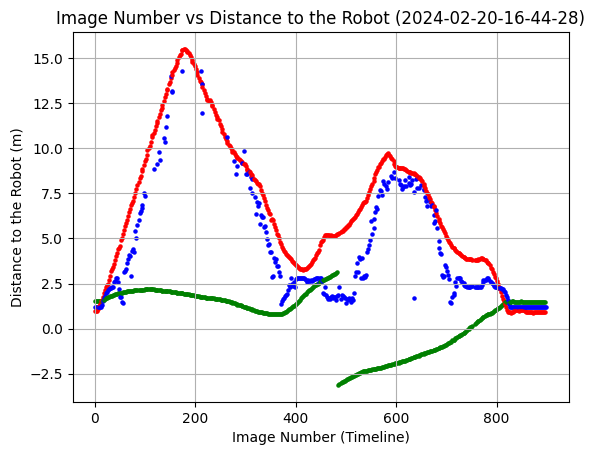

In [8]:
# change the order of columns
data_df_with_gt = data_df_with_gt[['filename','inference_time', 'robot_in_the_frame_or_not','detected_or_not',"parallel_pixel_dist", "size","perp_dist_to_the_robot_pred",'dist_to_the_robot_gt','angle']]

plot.plot_size_vs_preds(data_df_with_gt)

data_df_with_gt.to_csv("./csv_data/2024-02-20-16-44-28_first_floor_testing_dataframe.csv", index=False)